In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from pathlib import Path

# make sure plots are displayed correctly on notebooks
%pylab inline
%matplotlib inline
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# FFT, Power Spectrum, Energy

Mean of f  -1.4210854715202004e-17


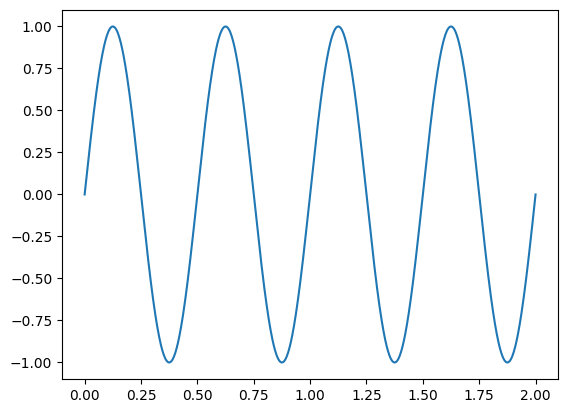

In [2]:
starttime = 0.0
endtime = 2.0
steps = 1000
t = np.linspace(starttime, endtime, num=steps)

theta = [2,4,12] # these are the frequencies
f = np.sin(2*np.pi*theta[0]*t) #+ np.sin(2*np.pi*theta[1]*t) + np.sin(2*np.pi*theta[2]*t)
dc = np.mean(f)
print('Mean of f ', dc)

plt.plot(t, f)

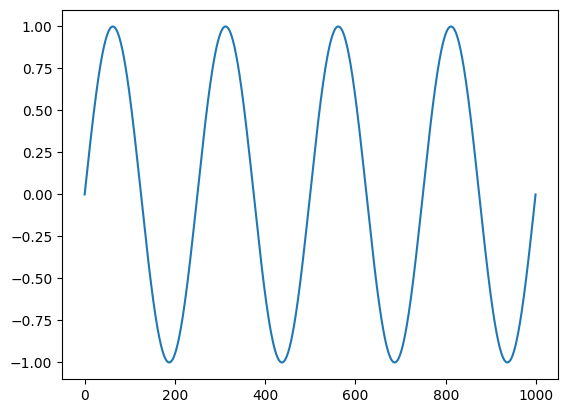

In [3]:
f = f - dc
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

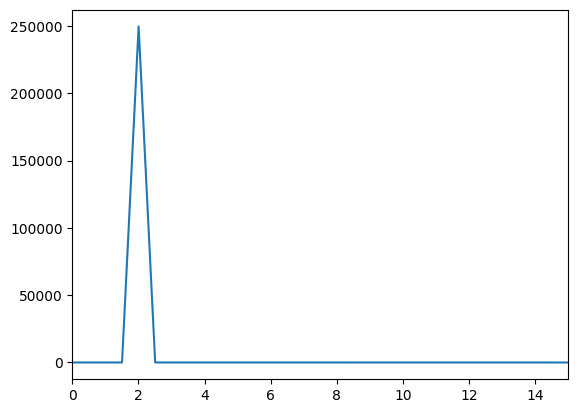

In [4]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [5]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]
for i in range(len(theta)):
    print(theta[i], powspec[2*theta[i]]) 

2 249736.73880337158
4 0.4459767961933231
12 0.02950275086152221


In [6]:
np.sum(powspec) # this is probably what Dambre calls total energy E_tot

249749.9999208767

In [7]:
de_fi = powspec[2*theta[i]]/np.sum(powspec)

In [8]:
de_fi

1.18129132616092e-07

## Test with Linear Reservoir

In [9]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [10]:
import torch
from ESN import Reservoir

identity_activation = torch.nn.Identity()

linear_reservoir = Reservoir(1, 1, bias=True, activation=identity_activation)

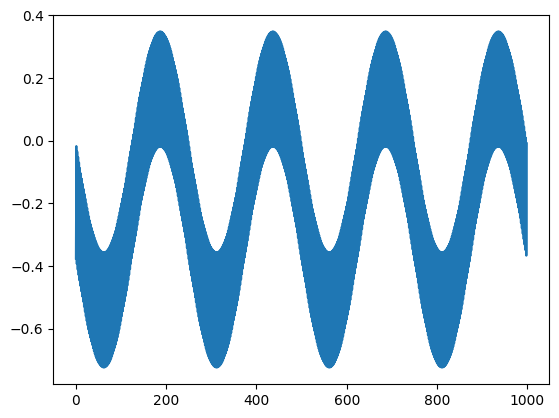

In [11]:
f_res = linear_reservoir.predict(f).flatten().numpy()
plt.plot(np.arange(len(f_res)), f_res)

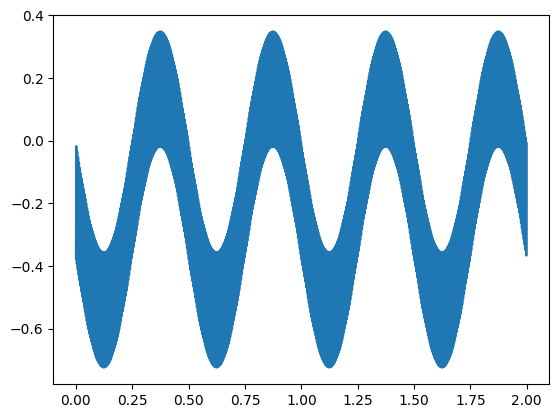

In [12]:
plt.plot(t, f_res)

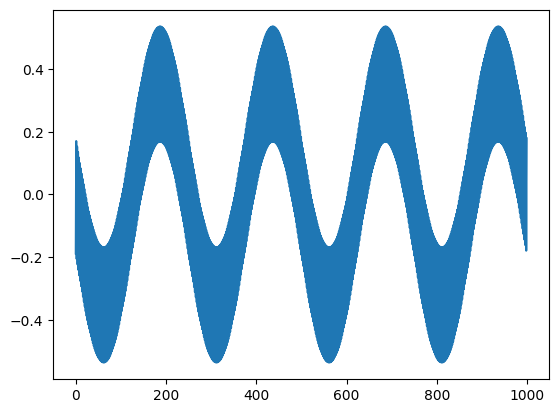

In [13]:
f = f_res - np.mean(f_res)
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

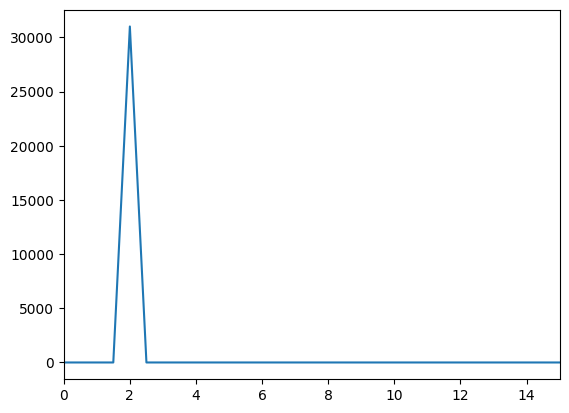

In [14]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [15]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]for i in range(len(theta)):
print(theta[0], powspec[2*theta[0]]) 

2 31010.78480498835


In [16]:
de_fi = 1 - powspec[2*theta[0]]/np.sum(powspec)

In [17]:
de_fi

5.309705782530205e-05

## Test with Nonlinear Reservoir

In [18]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [19]:
import torch
from ESN import Reservoir

identity_activation = torch.nn.Identity()

reservoir = Reservoir(1, 1, bias=True)

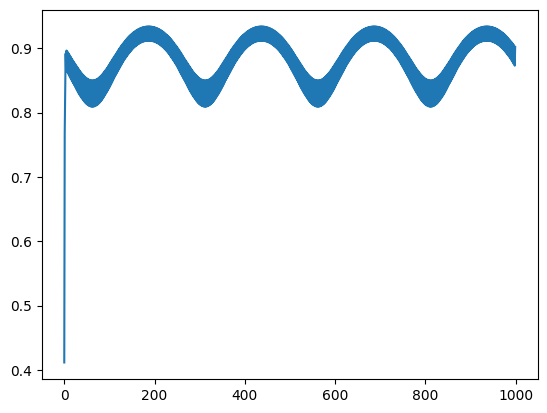

In [20]:
f_res = reservoir.predict(f).flatten().numpy()
plt.plot(np.arange(len(f_res)), f_res)

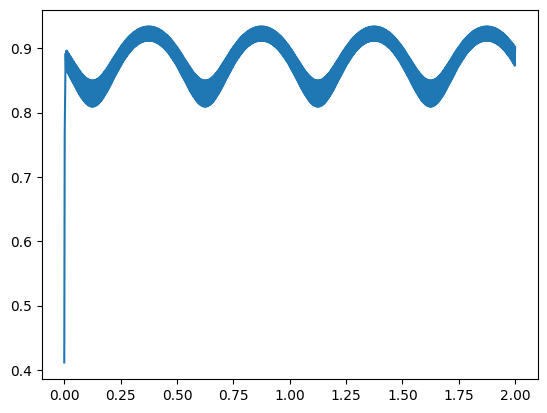

In [21]:
plt.plot(t, f_res)

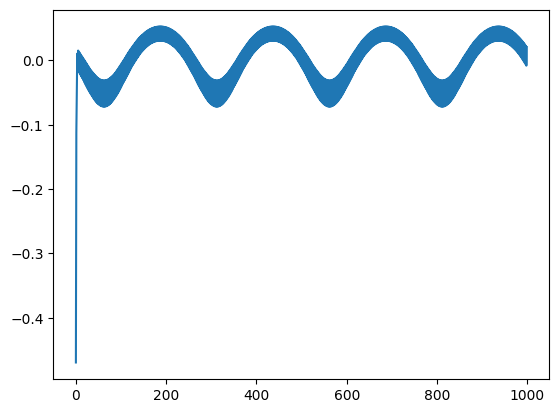

In [22]:
f = f_res - np.mean(f_res)
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

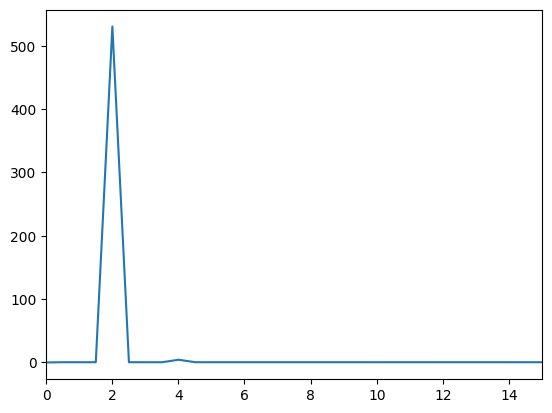

In [23]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [24]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]for i in range(len(theta)):
print(theta[0], powspec[2*theta[0]]) 

2 530.4957570605449


In [25]:
de_fi = 1 - powspec[2*theta[0]]/np.sum(powspec)

In [26]:
de_fi

0.1890132286849805

## Generalize to more than one unit

In [27]:
def deviation_from_linearity(signal, theta, verbose = True):
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    fhat = np.fft.fft(signal)
    N = len(fhat)
    halvedfhat = fhat[0:int(N/2)]
    powspec = abs(halvedfhat)**2

    fs = steps/(endtime - starttime)

    freq = np.linspace(0,int(fs/2),int(N/2))
    de_phi =  (1 - powspec[2*theta]/np.sum(powspec))

    if verbose: 
        print(f"Frequence:{theta}, Deviation: {de_phi}, Powerspect: {powspec[2*theta]}, Total Energy: {np.sum(powspec)}") 

        plt.plot(freq,powspec)
        plt.xlim([0, 100])

    return de_phi

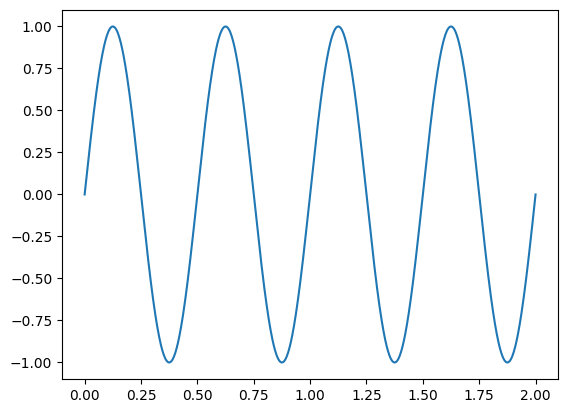

In [28]:
f = np.sin(2*np.pi*theta[0]*t) 
plt.plot(t, f)

In [29]:
reservoir = Reservoir(1, 10, bias=True, ro_rescale=0.9)
linear_reservoir = Reservoir(1, 10, bias=True,  activation=torch.nn.Identity(), ro_rescale=0.9)

In [30]:
f_res = reservoir.predict(f).numpy()
f_rlin = linear_reservoir.predict(f).numpy()

In [31]:
f_res.shape

(1000, 10)

In [32]:
# Subtract the DC component
f_res -= np.mean(f_res, axis=0)
f_rlin -= np.mean(f_rlin, axis=0)

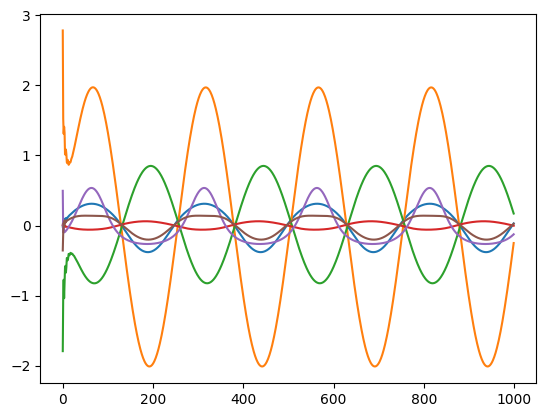

In [33]:
plt.plot(np.arange(len(f_res)), f_res[:,5])
plt.plot(np.arange(len(f_rlin)), f_rlin[:,8])
plt.plot(np.arange(len(f_rlin)), f_rlin[:,1])
plt.plot(np.arange(len(f_res)), f_res[:,3])
plt.plot(np.arange(len(f_rlin)), f_res[:,4])
plt.plot(np.arange(len(f_rlin)), f_res[:,1])

In [34]:
# Average over all neurons
f_res = np.mean(f_res, axis=1)
f_rlin = np.mean(f_rlin, axis=1)

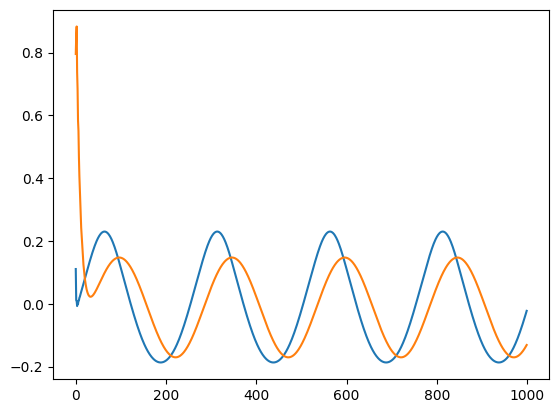

In [35]:
plt.plot(np.arange(len(f_res)), f_res)
plt.plot(np.arange(len(f_rlin)), f_rlin)

Frequence:2, Deviation: 0.011013981597415845, Powerspect: 10499.144625210121, Total Energy: 10616.069822876161
0.011013981597415845
Frequence:2, Deviation: 0.37529876553198416, Powerspect: 5404.073892808224, Total Energy: 8650.653455823942
0.37529876553198416


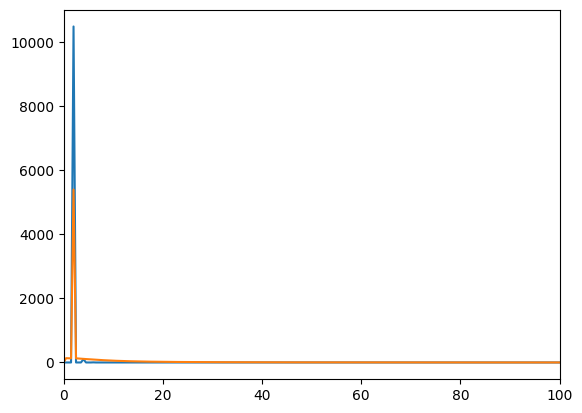

In [36]:
print(deviation_from_linearity(f_res, 2))
print(deviation_from_linearity(f_rlin, 2))

### Last step - Iterate over a range of initial carrier frequency

The range and the rescaling of the carrier frequencies for the various input sinussoids determines the scale of the metric. 

On the other hand, such a scale also depends on the spectral radius of the reservoir. 

In [37]:
theta_range = (np.linspace(0.01, 0.5, 100)*200).astype(int)

In [38]:
theta_range

array([  2,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [39]:
result_table = torch.zeros(2,2)

Frequence:2, Deviation: 0.017473229288749836, Powerspect: 536.9894832021967, Total Energy: 546.5392895233485
Frequence:2, Deviation: 0.01622558054585599, Powerspect: 537.1199894635497, Total Energy: 545.9788126647728
Frequence:3, Deviation: 0.015994238595946286, Powerspect: 536.1597117528012, Total Energy: 544.8745655592179
Frequence:4, Deviation: 0.015667007251545795, Powerspect: 534.8280910815582, Total Energy: 543.3406123960261
Frequence:5, Deviation: 0.01527251412709174, Powerspect: 533.1358784431931, Total Energy: 541.4044861057134
Frequence:6, Deviation: 0.014827773975257696, Powerspect: 531.096067933598, Total Energy: 539.0895661732344
Frequence:7, Deviation: 0.014350831998127811, Powerspect: 528.723146611068, Total Energy: 536.4212376731431


Frequence:8, Deviation: 0.01386019309292974, Powerspect: 526.0329494538572, Total Energy: 533.4263415485756
Frequence:9, Deviation: 0.013374386948442729, Powerspect: 523.0420228415416, Total Energy: 530.1322162353081
Frequence:10, Deviation: 0.012911716684046004, Powerspect: 519.7672150645867, Total Energy: 526.5660871979128
Frequence:11, Deviation: 0.012489992944096251, Powerspect: 516.2254656815558, Total Energy: 522.7546677937936
Frequence:12, Deviation: 0.012126419755527418, Powerspect: 512.4331672103123, Total Energy: 518.7234252013285
Frequence:13, Deviation: 0.011837391038928557, Powerspect: 508.4061343324909, Total Energy: 514.496429759689
Frequence:14, Deviation: 0.011638278518705358, Powerspect: 504.15920193828646, Total Energy: 510.09583938832054
Frequence:15, Deviation: 0.011543071274162542, Powerspect: 499.7061332463545, Total Energy: 505.54163638722906
Frequence:16, Deviation: 0.011564055067225687, Powerspect: 495.0596398925828, Total Energy: 500.85151438543943
Frequence:

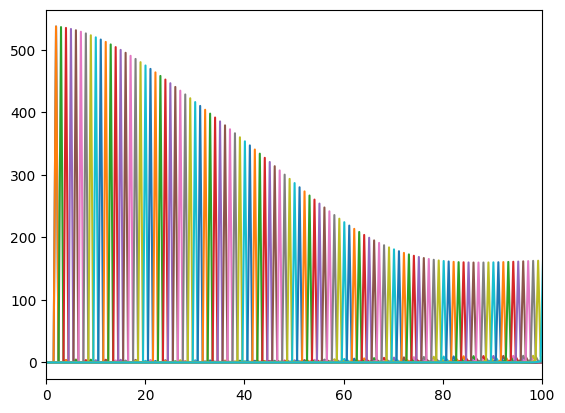

In [40]:
de_acc = 0
reservoir = Reservoir(1, 100, bias=True, ro_rescale=0.9)

for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)

    
    de_acc += deviation_from_linearity(f_res, theta, verbose=True)

de_fi = de_acc/len(theta_range)
result_table[0,0] = de_fi
print(de_fi)



Frequence:2, Deviation: 0.01748070671044588, Powerspect: 684.7478336706608, Total Energy: 696.9306743871356
Frequence:2, Deviation: 0.016347753484871497, Powerspect: 684.9527399434876, Total Energy: 696.3362736883182
Frequence:3, Deviation: 0.01604230448576327, Powerspect: 683.4650648850604, Total Energy: 694.6081808200782
Frequence:4, Deviation: 0.015614203728920528, Powerspect: 681.3996438071201, Total Energy: 692.2079192815545
Frequence:5, Deviation: 0.01510016604937714, Powerspect: 678.7733177321102, Total Energy: 689.1800509392104
Frequence:6, Deviation: 0.014521912248952162, Powerspect: 675.6066438834602, Total Energy: 685.5623197317933
Frequence:7, Deviation: 0.013902155910267777, Powerspect: 671.9240794690555, Total Energy: 681.3969663317835
Frequence:8, Deviation: 0.013263861027660306, Powerspect: 667.7534584254139, Total Energy: 676.7295045267745
Frequence:9, Deviation: 0.012629628014318994, Powerspect: 663.1254195222622, Total Energy: 671.6075733452117
Frequence:10, Deviatio

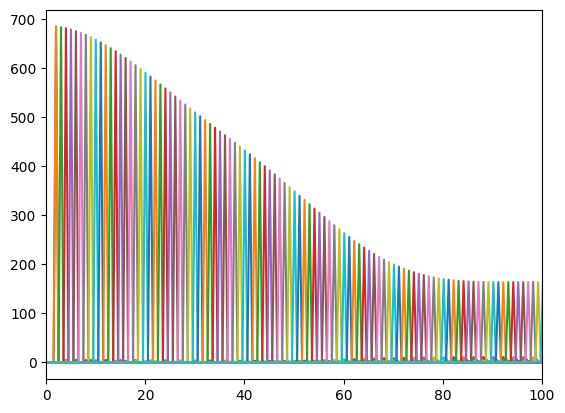

In [41]:
de_acc = []
reservoir.reset_initial_state()
reservoir.rescale_weights(0.99) #activation=torch.nn.Tanh())

for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)
    
    de_theta = deviation_from_linearity(f_res, theta, verbose=True)
    de_acc.append(de_theta)


de_fi = sum(de_acc)/len(theta_range)
result_table[1,0] = de_fi
print(de_fi)


Frequence:2, Deviation: 0.09033489507835868, Powerspect: 5328.636392025741, Total Energy: 5857.800154359829
Frequence:2, Deviation: 0.00010648135401625236, Powerspect: 5120.210467413211, Total Energy: 5120.755732417185
Frequence:3, Deviation: 0.0016444517355708177, Powerspect: 6870.57779588897, Total Energy: 6881.894739637583
Frequence:4, Deviation: 0.0019241752821659297, Powerspect: 10050.15571156539, Total Energy: 10069.531254708698
Frequence:5, Deviation: 0.0023397501550144195, Powerspect: 15861.009812619535, Total Energy: 15898.20764642471
Frequence:6, Deviation: 0.0029202797861892504, Powerspect: 27015.594232136013, Total Energy: 27094.718390564467
Frequence:7, Deviation: 0.003629241792721838, Powerspect: 49462.0243202906, Total Energy: 49642.18782302005
Frequence:8, Deviation: 0.0042898467234216975, Powerspect: 90492.74075546136, Total Energy: 90882.61323606811
Frequence:9, Deviation: 0.006216939410392919, Powerspect: 123135.25451913799, Total Energy: 123905.56792755392
Frequence

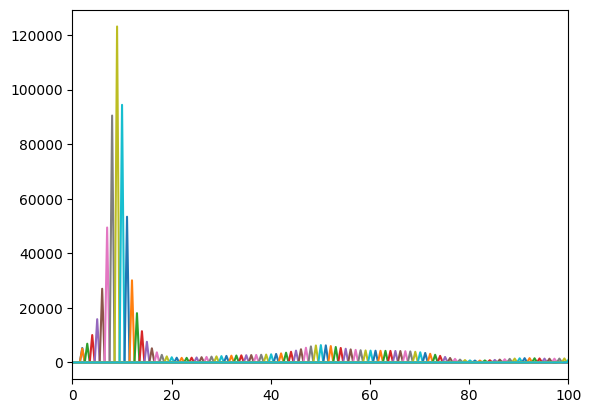

In [42]:
de_acc = [ ]
reservoir.reset_initial_state()
reservoir.activation = torch.nn.Identity()#)
reservoir.rescale_weights(0.99) 


for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)

    
    de_acc.append(deviation_from_linearity(f_res, theta, verbose=True))

de_fi = sum(de_acc)/len(theta_range)
result_table[1, 1] = de_fi
print(de_fi)


Frequence:2, Deviation: 0.09033489507835868,  Powerspect: 5328.636392025741, Total Energy: 5857.800154359829
Frequence:2, Deviation: 0.00010648135401625236,  Powerspect: 5120.210467413211, Total Energy: 5120.755732417185
Frequence:3, Deviation: 0.0016444517355708177,  Powerspect: 6870.57779588897, Total Energy: 6881.894739637583
Frequence:4, Deviation: 0.0019241752821659297,  Powerspect: 10050.15571156539, Total Energy: 10069.531254708698
Frequence:5, Deviation: 0.0023397501550144195,  Powerspect: 15861.009812619535, Total Energy: 15898.20764642471
Frequence:6, Deviation: 0.0029202797861892504,  Powerspect: 27015.594232136013, Total Energy: 27094.718390564467
Frequence:7, Deviation: 0.003629241792721838,  Powerspect: 49462.0243202906, Total Energy: 49642.18782302005
Frequence:8, Deviation: 0.0042898467234216975,  Powerspect: 90492.74075546136, Total Energy: 90882.61323606811
Frequence:9, Deviation: 0.006216939410392919,  Powerspect: 123135.25451913799, Total Energy: 123905.56792755392


0.046952440094869506

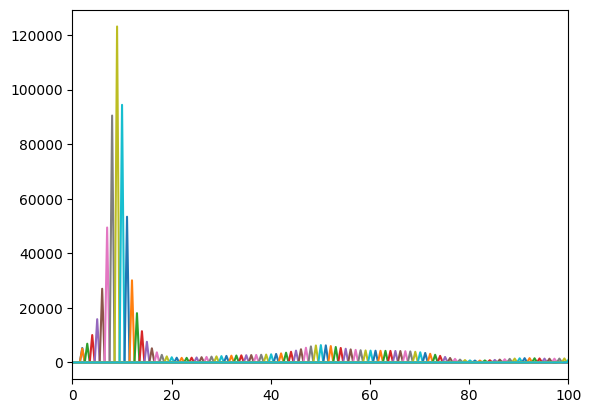

In [43]:
reservoir.reset_initial_state()
reservoir.de_fi(verbose=True, plot=True, theta_range=theta_range)

Frequence:2, Deviation: 0.0029762273081727075,  Powerspect: 6367.106874339047, Total Energy: 6386.113399431522
Frequence:2, Deviation: 5.252610747774611e-05,  Powerspect: 6355.705563879025, Total Energy: 6356.039421888832
Frequence:3, Deviation: 0.0001391605054997802,  Powerspect: 6501.203339451936, Total Energy: 6502.108176112538
Frequence:4, Deviation: 0.00023198315736372432,  Powerspect: 6681.603200931634, Total Energy: 6683.153580000269
Frequence:5, Deviation: 0.0003478232215712307,  Powerspect: 6868.532521490602, Total Energy: 6870.922387850711
Frequence:6, Deviation: 0.00048602692101284983,  Powerspect: 7027.7350797292775, Total Energy: 7031.1524090858375
Frequence:7, Deviation: 0.0006462061330830826,  Powerspect: 7121.331114333197, Total Energy: 7125.935937840186
Frequence:8, Deviation: 0.0008284774865759958,  Powerspect: 7114.619476770658, Total Energy: 7120.518666178331
Frequence:9, Deviation: 0.0010337739909117571,  Powerspect: 6984.544876177661, Total Energy: 6991.7727890373

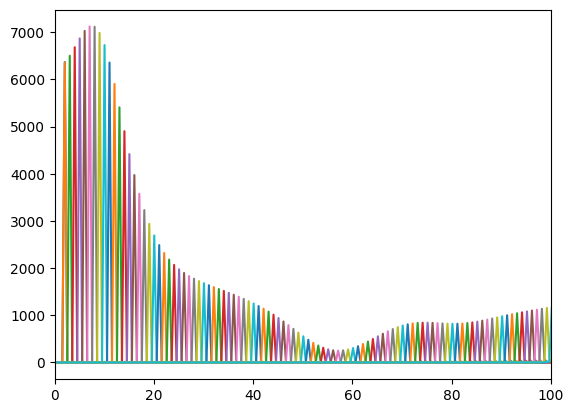

In [44]:
reservoir.reset_initial_state()
reservoir.rescale_weights(0.9)
de_fi = reservoir.de_fi(verbose=True, plot=True, theta_range=theta_range)
result_table[0,1] = de_fi
print(de_fi)

## Summing Up 

In [45]:
result_table = result_table.numpy()

## 

In [46]:
print("----------", "|", "-- Tanh --", "|", "-- Linear --" )
print("rho = 0.99", "|", result_table[1, 0], "|", result_table[1, 1] )
print("rho = 0.90",  "|",result_table[0, 0], "|", result_table[0, 1] )


---------- | -- Tanh -- | -- Linear --
rho = 0.99 | 0.081974156 | 0.04695244
rho = 0.90 | 0.09089312 | 0.04486428
